# B站排行榜RANK100数据预处理及探索性数据分析
***
项目地址: [github](https://github.com/RubyRose-TAT/bilibili_Data_analysis-Clout_prediction/tree/main/bilibili)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use({'figure.figsize':(15,10)})

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 数据读取

In [2]:
df = pd.read_csv('data/bilibili_rank100_data.csv')

In [3]:
df.head()

,author,title,tag,partition,funs,like,coins,collect,share,danmu,reply,time,like_rate,views
0,木鱼水心,许三多孤身入敌！老A全军覆没？《士兵突击》P8,影视 影视杂谈,all,7965289,247781,143746,24366,2807,28080,7246,67.316667,0.153092,1618512
1,歪果仁研究协会,我在第一次见面的地方向她求婚了,生活 日常,all,4049110,207752,228697,28627,5070,16583,8594,45.666667,0.174802,1188497
2,是老胡没错,社 交 废 物 4,生活 搞笑,all,813083,203563,62321,32952,17195,7308,6795,72.416667,0.088406,2302605
3,鲁大能,“你 开 炮 啊 ！”【迫击炮快乐阴人流#2】,游戏 网络游戏,all,1964943,167715,122199,29608,5901,9272,1883,54.016667,0.140297,1195430
4,进击的金厂长,当 代 毕 业 生 生 存 现 状 3.0,动画 综合,all,2689136,128799,116933,38051,6813,4448,3357,70.316667,0.080464,1600703


## 数据预处理

In [4]:
# 按标题去重
df = df.drop_duplicates(subset=['title'],keep='last',inplace=False)

In [5]:
# 是否有缺失值
df.isnull().any()

author       False
title        False
tag           True
partition    False
funs         False
like         False
coins        False
collect      False
share        False
danmu        False
reply        False
time         False
like_rate    False
views        False
dtype: bool

In [6]:
# 缺失值处理
df = df.drop(df[df['time']>1000].index)
df[df.isnull().values==True]

,author,title,tag,partition,funs,like,coins,collect,share,danmu,reply,time,like_rate,views
5504,次元小主,圆满了！时隔16年，官方终于出又大电影了！,NaN,guochuang,107330,19904,3049,13581,122,172,181,166.302921,0.012275,1621472
5507,-_艾达王_-,《尸兄59》白小飞蜕变为白龙守护者！尸王了结心路历程！人类集结所有战力和尸王决战！！最终大战...,NaN,guochuang,74638,11862,9127,2028,67,404,466,1.323056,0.095506,124202
5518,龙珠哥哥呀,智者的对决，使用脑发达药水后，智商提升100倍，舌战相当激烈！,NaN,guochuang,9541,14408,31,675,8,91,160,5.175903,0.063780,225902
5519,蘭因絮菓,"不良人5新pv发布:""李星云最终还是活成了大帅！""",NaN,guochuang,1430,4010,415,375,181,190,555,3.284190,0.035002,114566
5522,阿奇小哥,那个男人带着压迫感又回来了！,NaN,guochuang,4596,140738,1423,24526,680,227,470,19.227975,0.144035,977107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,生活纪实录,女子为证清白主动要求做DNA，报告出来后，自己都不知谁是孩子爹,NaN,rookie,1242,14821,722,2385,7891,2832,2998,5.794375,0.017965,825002
7270,大富翁酒吧老板-阿杰,我是不是最惨的酒吧老板。我在杭州滨江花了300w开了这么一家酒吧,NaN,rookie,3716,37489,504,3536,1831,828,2566,4.975764,0.034894,1074373
7286,看视频要戴头盔,学霸到底有多厉害！保送北大都能放弃！,NaN,rookie,97,52890,41,1315,19,73,263,11.418160,0.105147,503012
7291,bili_64364371448,江西某211某食堂木桶饭现状,NaN,rookie,26,7859,46,530,1027,130,1086,4.596424,0.018683,420649


In [7]:
# 重置索引
df=df.reset_index(drop=True, inplace=False)

In [8]:
# 分区按序号编码
def LabelEncoding(df):
    x, dfc = 'partition', df
    key = dfc[x].unique()  # 将唯一值作为关键字
    value = [i for i in range(len(key))]
    Dict = dict(zip(key, value))
    for i in range(len(key)):
        for j in range(dfc.shape[0]):
            if key[i] == dfc[x][j]:
                dfc[x][j] = Dict[key[i]]
    dfc[x] = dfc[x].astype(np.int64)
    return dfc

df = LabelEncoding(df)

<ipython-input-8-57013574b070>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[x][j] = Dict[key[i]]


In [9]:
df = df.drop(["author","title","tag"],axis = 1)

In [10]:
df.head()

,partition,funs,like,coins,collect,share,danmu,reply,time,like_rate,views
0,0,176233,105149,476,15999,3271,275,2119,116.800000,0.105483,996837
1,1,717948,62533,31623,4020,689,736,2104,72.516667,0.128407,486992
2,2,3479822,41622,4923,7103,1595,1221,2095,102.050000,0.046869,888059
3,2,9875,8659,843,732,458,239,1371,98.716667,0.036044,240236
4,2,411101,12543,3244,2302,459,828,819,95.550000,0.074651,168022


## 数据统计分析

In [11]:
df.shape

(5920, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   partition  5920 non-null   int64  
 1   funs       5920 non-null   int64  
 2   like       5920 non-null   int64  
 3   coins      5920 non-null   int64  
 4   collect    5920 non-null   int64  
 5   share      5920 non-null   int64  
 6   danmu      5920 non-null   int64  
 7   reply      5920 non-null   int64  
 8   time       5920 non-null   float64
 9   like_rate  5920 non-null   float64
 10  views      5920 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 508.9 KB


In [13]:
# 显示统计数据
df.describe()

,partition,funs,like,coins,collect,share,danmu,reply,time,like_rate,views
count,5920.000000,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5.920000e+03
mean,8.575338,5.497294e+05,5.088168e+04,1.423843e+04,1.278288e+04,3.798060e+03,2062.864527,1277.924493,90.892307,0.076995,7.112605e+05
std,5.096110,1.222176e+06,1.307200e+05,9.593593e+04,6.803866e+04,3.067992e+04,13193.650006,4326.644209,121.163857,0.041247,2.382650e+06
min,0.000000,0.000000e+00,1.750000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.109340,0.000358,4.677000e+03
25%,4.000000,9.620750e+03,8.164500e+03,4.240000e+02,1.317000e+03,1.760000e+02,157.750000,262.000000,12.654497,0.049113,1.367135e+05
50%,9.000000,1.362985e+05,2.049500e+04,1.931500e+03,3.394500e+03,5.960000e+02,475.000000,555.000000,61.675000,0.073319,3.135225e+05
75%,13.000000,5.307035e+05,5.187750e+04,7.543250e+03,8.957750e+03,2.123750e+03,1498.000000,1243.000000,98.922361,0.100150,7.296138e+05
max,17.000000,2.016257e+07,4.521965e+06,4.665576e+06,3.133324e+06,1.898377e+06,775411.000000,266435.000000,938.716667,0.524810,1.233249e+08


##  相关性分析
***
**正相关的特征:**  
 - 点赞数
 - 收藏数
 - 投币数
 - 分享数
 - 发布时间


**负相关的特征:**
 - 点赞率
 - 收藏率

**思考:**
- 什么特征的影响最大?
- 什么特征之间相关性最大?

,partition,funs,like,coins,collect,share,danmu,reply,time,like_rate,views
partition,1.000000,0.054761,0.039060,0.026836,0.007429,0.001273,0.034125,0.028300,-0.004653,-0.069175,0.023706
funs,0.054761,1.000000,0.170805,0.154412,0.053480,0.035057,0.142460,0.135168,-0.094909,0.195134,0.061417
like,0.039060,0.170805,1.000000,0.855280,0.886662,0.785168,0.689456,0.727272,0.312235,0.122999,0.887602
coins,0.026836,0.154412,0.855280,1.000000,0.878165,0.692935,0.615690,0.594661,0.170176,0.063188,0.741280
collect,0.007429,0.053480,0.886662,0.878165,1.000000,0.867208,0.763817,0.753830,0.243407,0.017386,0.903077
share,0.001273,0.035057,0.785168,0.692935,0.867208,1.000000,0.851075,0.878501,0.185742,-0.005934,0.902426
danmu,0.034125,0.142460,0.689456,0.615690,0.763817,0.851075,1.000000,0.856921,0.132882,0.023556,0.811533
reply,0.028300,0.135168,0.727272,0.594661,0.753830,0.878501,0.856921,1.000000,0.161184,0.034571,0.835068
time,-0.004653,-0.094909,0.312235,0.170176,0.243407,0.185742,0.132882,0.161184,1.000000,-0.056825,0.297047
like_rate,-0.069175,0.195134,0.122999,0.063188,0.017386,-0.005934,0.023556,0.034571,-0.056825,1.000000,-0.039507


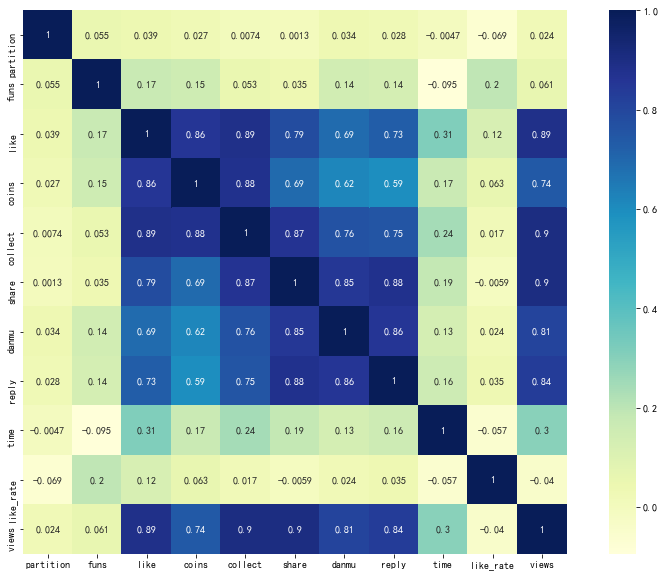

In [14]:
# 相关性矩阵
corr = df.corr()
sns.heatmap(corr,square=True,annot=True,cmap='YlGnBu')

corr

In [15]:
# 生成特征值与目标值
x = df.drop(['views'],axis=1)
y = df['views']

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
SelectKBest = SelectKBest(f_regression,k=6)
bestFeature = SelectKBest.fit_transform(x,y)
SelectKBest.get_support()
x.columns[SelectKBest.get_support()]

Index(['like', 'coins', 'collect', 'share', 'danmu', 'reply'], dtype='object')

In [17]:
df_best = df[['views','like', 'coins', 'collect', 'share', 'reply', 'time']]

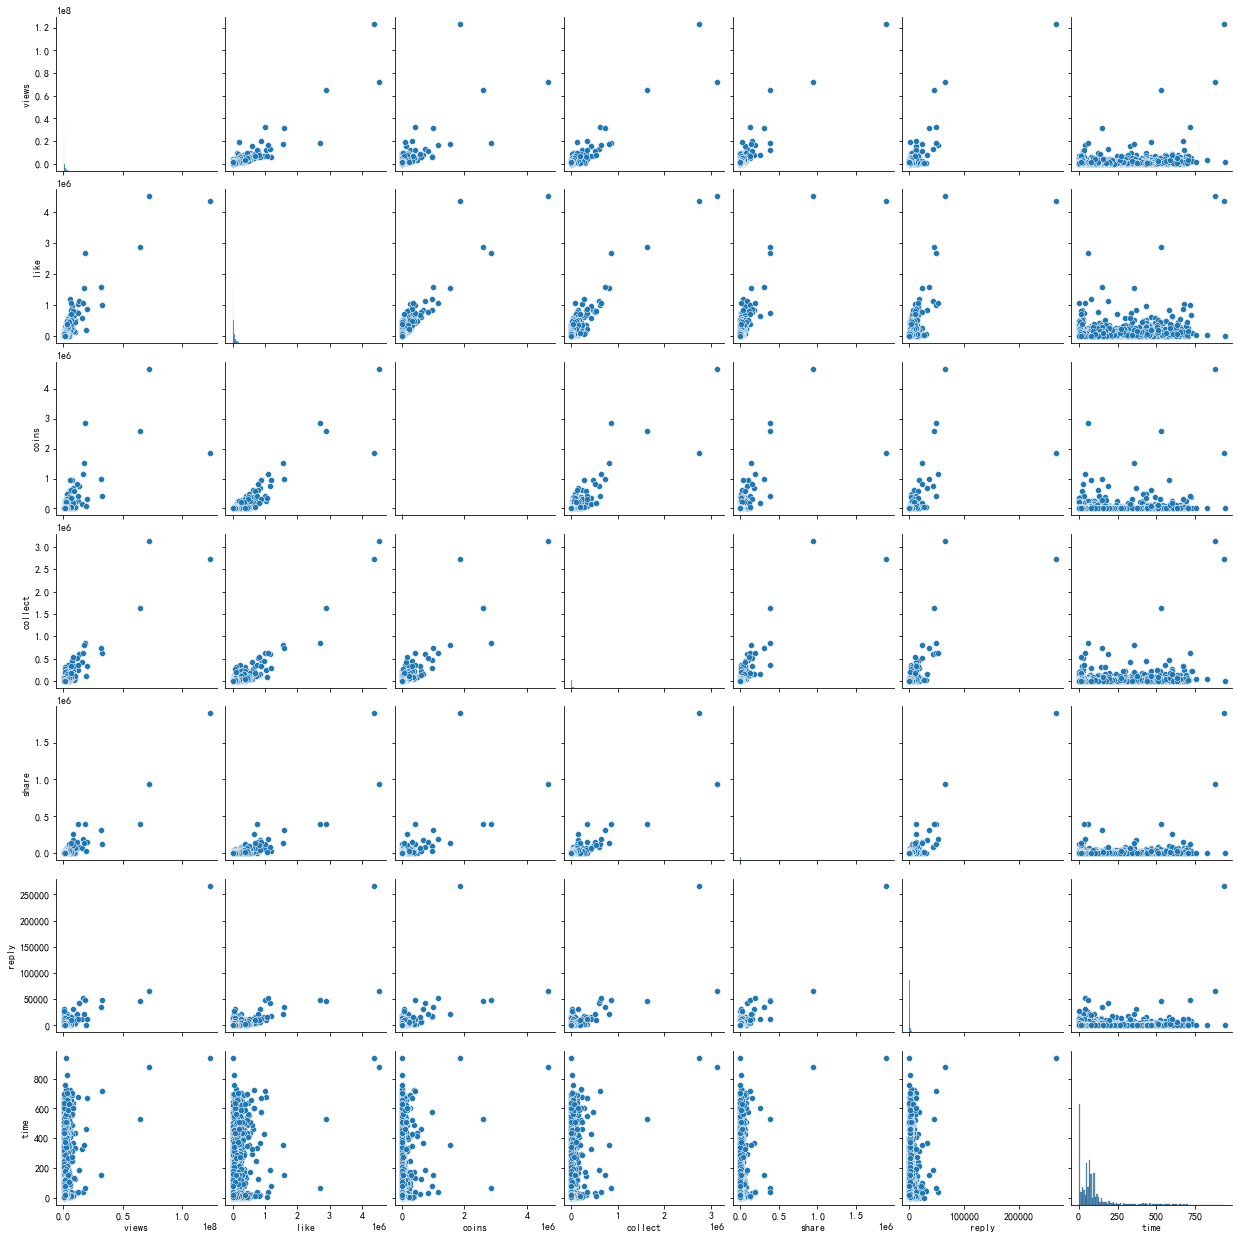

In [18]:
sns.pairplot(df_best)

In [19]:
df_best.corr()

,views,like,coins,collect,share,reply,time
views,1.000000,0.887602,0.741280,0.903077,0.902426,0.835068,0.297047
like,0.887602,1.000000,0.855280,0.886662,0.785168,0.727272,0.312235
coins,0.741280,0.855280,1.000000,0.878165,0.692935,0.594661,0.170176
collect,0.903077,0.886662,0.878165,1.000000,0.867208,0.753830,0.243407
share,0.902426,0.785168,0.692935,0.867208,1.000000,0.878501,0.185742
reply,0.835068,0.727272,0.594661,0.753830,0.878501,1.000000,0.161184
time,0.297047,0.312235,0.170176,0.243407,0.185742,0.161184,1.000000


array([[<AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'like'}>,
        <AxesSubplot:title={'center':'coins'}>],
       [<AxesSubplot:title={'center':'collect'}>,
        <AxesSubplot:title={'center':'share'}>,
        <AxesSubplot:title={'center':'reply'}>],
       [<AxesSubplot:title={'center':'time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

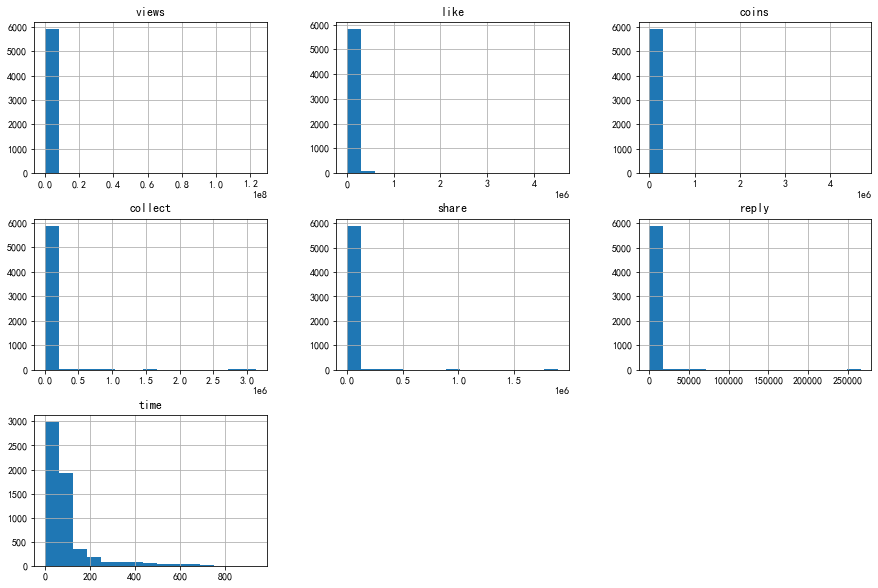

In [20]:
df_best.hist(bins=15)

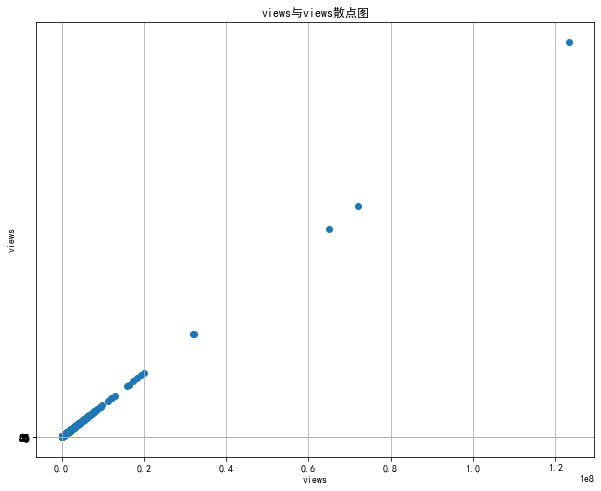

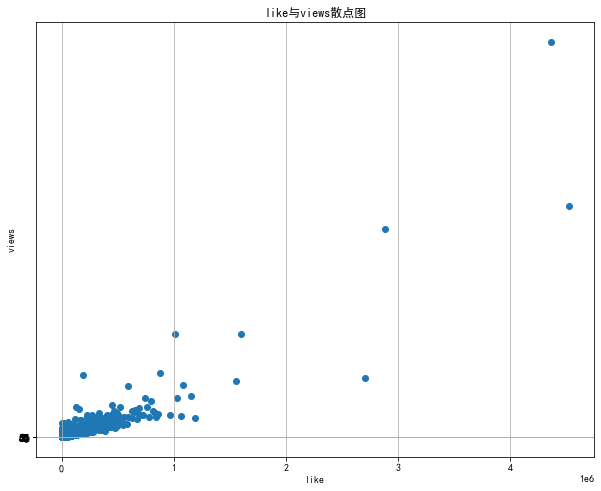

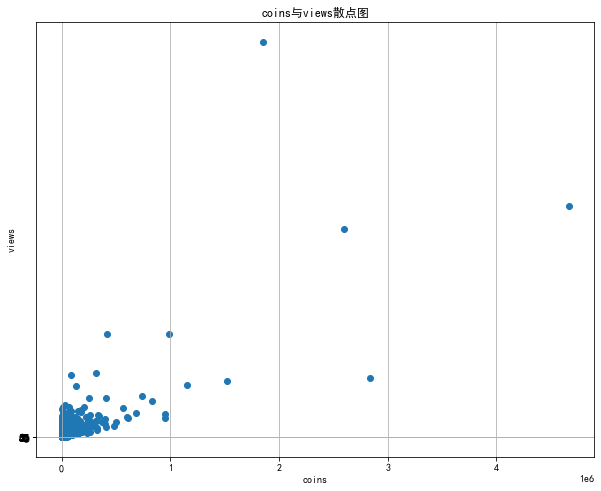

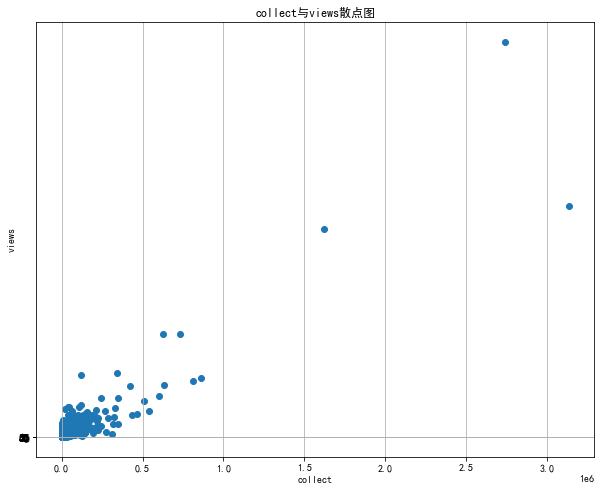

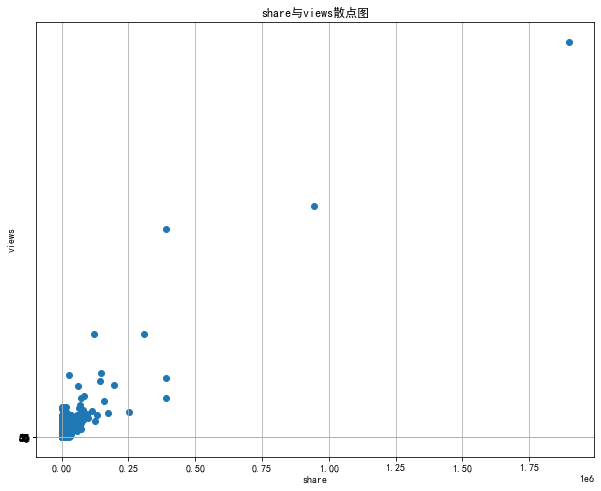

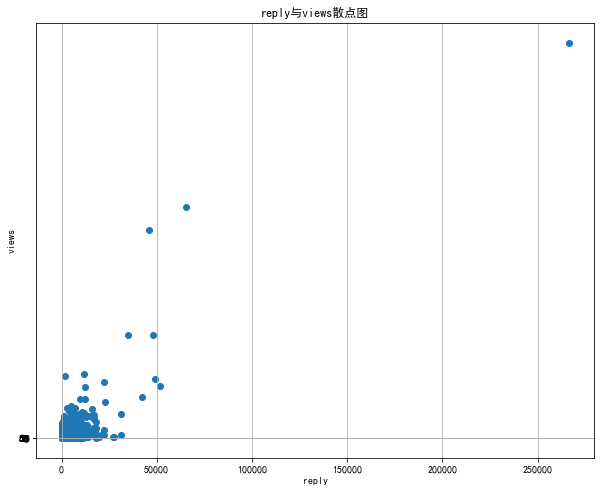

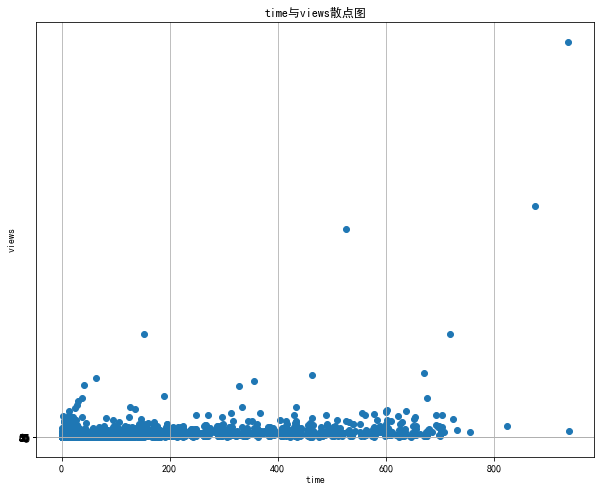

In [21]:
plt.style.use({'figure.figsize':(10,8)})
for each in df_best.columns:
    plt.scatter(df_best[each], df['views'])
    plt.title('{}与views散点图'.format(each))
    plt.xlabel(each)
    plt.ylabel('views')
    plt.yticks (range(0,60,5))
    plt.grid()
    plt.show ()